In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
monthly = pd.read_csv('../alt_data/monthly_data_3.csv')
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        554 non-null    object 
 1   avg_weeks_unemployed        554 non-null    float64
 2   cont_claims_insur_unemploy  554 non-null    float64
 3   full_employ_level           554 non-null    float64
 4   part_employ_level           554 non-null    float64
 5   not_in_labor_force          554 non-null    float64
 6   gov_unemp_insur             554 non-null    float64
 7   labor_particip_women        554 non-null    float64
 8   labor_particip_men          554 non-null    float64
 9   labor_particip_total        554 non-null    float64
 10  real_estate_loans           554 non-null    float64
 11  consumer_loans              554 non-null    float64
 12  commerc_indust_loans        554 non-null    float64
 13  m1_real                     554 non

In [4]:
monthly['DATE'] = pd.to_datetime(monthly['DATE']).dt.to_period('M')
monthly.set_index('DATE', inplace=True)
monthly.head()

,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,real_estate_loans,...,unemp_less_five_weeks,unemp_5_to_14_wks,unemp_15_to_26_wks,unemp_over_27_wks,personal_consum_exp,personal_save_rate,emp_pop_ratio,unemploy_rate,insured_unemploy_rate,target_leisure_hospitality
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01,10.7,3619250.0,85627.0,4133.0,58627.0,12.0,46.3,78.3,61.4,130.0257,...,3293.0,2646.0,930.0,625.0,975.6,13.2,56.4,8.1,5.500,5476.0
1975-02,11.7,3856500.0,85256.0,3994.0,59214.0,14.0,45.9,78.0,61.0,130.6318,...,2947.0,2616.0,1124.0,717.0,989.4,12.5,56.1,8.1,5.875,5484.0
1975-03,11.8,4175200.0,85187.0,4087.0,59052.0,16.5,46.2,78.0,61.2,131.1786,...,3193.0,2630.0,1305.0,769.0,990.6,12.7,56.0,8.6,6.340,5488.0
1975-04,12.9,4473500.0,85189.0,4179.0,59044.0,18.8,46.3,78.1,61.3,131.6391,...,2915.0,2719.0,1478.0,964.0,995.0,14.2,55.9,8.8,6.750,5472.0
1975-05,13.4,4578200.0,85451.0,3972.0,58820.0,19.6,46.4,78.3,61.5,131.7233,...,3051.0,2692.0,1554.0,1089.0,1018.9,17.3,56.0,9.0,6.880,5502.0


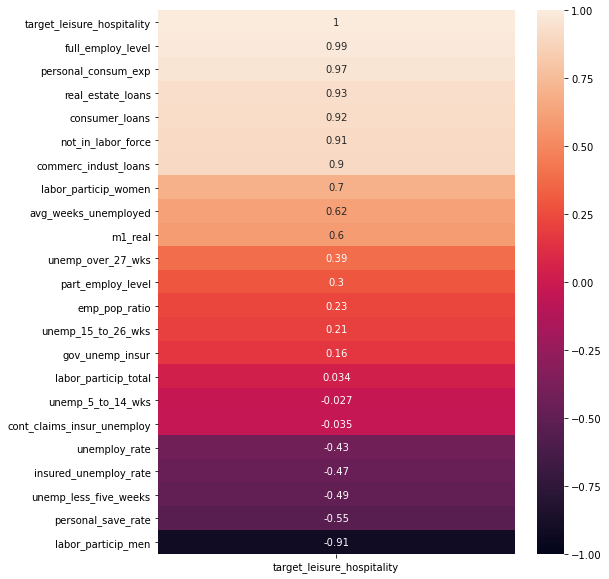

In [25]:
corr = monthly.corr()[['target_leisure_hospitality']].sort_values(by='target_leisure_hospitality', ascending=False)

plt.figure(figsize=(8,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

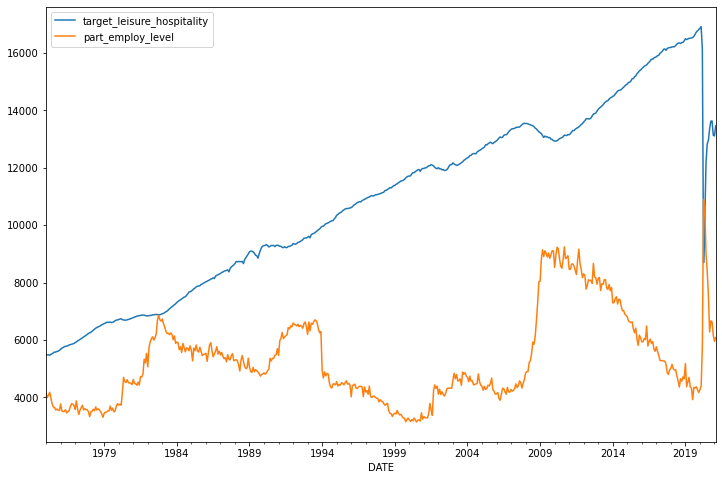

In [44]:
plt.figure(figsize=(12,8))
monthly['target_leisure_hospitality'].plot(kind='line')
monthly['part_employ_level'].plot(kind='line')
plt.legend();

In [50]:
X = monthly.drop(columns='target_leisure_hospitality')
y = monthly['target_leisure_hospitality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf', RandomForestRegressor())
])

params = {
    'rf__n_estimators': [75, 100, 125],
    'rf__min_samples_leaf': [1, 3, 5],
    'rf__ccp_alpha': [0.0, 0.01, 0.001],
    'rf__max_depth': [2, 5, 10]
}

gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=1)

gs.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__ccp_alpha': [0.0, 0.01, 0.001],
                         'rf__max_depth': [2, 5, 10],
                         'rf__min_samples_leaf': [1, 3, 5],
                         'rf__n_estimators': [75, 100, 125]},
             verbose=1)

In [51]:
gs.best_score_

0.9941873943131319

In [52]:
gs.best_params_

{'rf__ccp_alpha': 0.0,
 'rf__max_depth': 10,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 75}

In [54]:
pred = gs.predict(X_test)

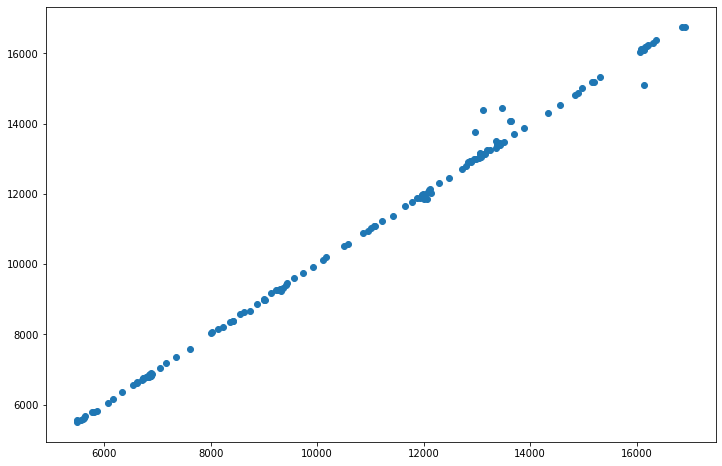

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, pred);

In [61]:
mean_squared_error(y_test, pred, squared=False)

189.04676009917938

In [63]:
gs.score(X_train, y_train)

0.9992885478471658

In [64]:
gs.score(X_test, y_test)

0.9966493064445161